In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('biosensing_data.csv')

In [3]:
label_encoder = LabelEncoder()
df['classification_label_number'] = label_encoder.fit_transform(df.iloc[:, -1])
df.head()

,Sample_ID,Biosensor_Type,Pathogen_ID,Pathogen_Class,Microbial_Signature,Signal_Quality,Normalized_Data,Classification_Label,classification_label_number
0,sample_0001,Electrochemical,pathogen_0001,Virus,"[0.686348465859171, 0.3519711095416459, 0.4792...",1,"[1.0, 0.5128169247104654, 0.6982014062284271]",Hepatitis,4
1,sample_0002,Electrochemical,pathogen_0002,Virus,"[0.511492541035177, 0.5906264985400667, 0.4373...",1,"[0.8660169198292051, 1.0, 0.7405203790625393]",Influenza,5
2,sample_0003,Optical,pathogen_0003,Fungi,"[0.34381169127876693, 0.3692560064866732, 0.11...",1,"[0.9310930228325897, 1.0, 0.316247859168712]",Aspergillus,0
3,sample_0004,Electrochemical,pathogen_0004,Bacteria,"[0.6662803385340104, 0.46467267273050455, 0.45...",1,"[1.0, 0.6974131545783041, 0.6764207193004899]",L. monocytogenes,6
4,sample_0005,Electrochemical,pathogen_0005,Bacteria,"[0.7666226216524994, 0.38892208052687616, 0.38...",1,"[1.0, 0.5073188157277855, 0.5053355232959593]",Salmonella,8


In [4]:
# within cluster -- std()

import pandas as pd
from tabulate import tabulate

df[['feature1', 'feature2', 'feature3']] = df['Microbial_Signature'].apply(eval).apply(pd.Series)

std_df = df.groupby('Classification_Label')[['feature1', 'feature2', 'feature3']].std().reset_index()

print(tabulate(std_df, headers="keys", tablefmt="grid"))


+----+------------------------+------------+------------+------------+
|    | Classification_Label   |   feature1 |   feature2 |   feature3 |
+====+========================+============+============+============+
|  0 | Aspergillus            |   0.183776 |   0.172317 |   0.17544  |
+----+------------------------+------------+------------+------------+
|  1 | Candida                |   0.185139 |   0.17216  |   0.191708 |
+----+------------------------+------------+------------+------------+
|  2 | E. coli                |   0.143232 |   0.158111 |   0.168243 |
+----+------------------------+------------+------------+------------+
|  3 | HIV                    |   0.184331 |   0.172407 |   0.169203 |
+----+------------------------+------------+------------+------------+
|  4 | Hepatitis              |   0.179076 |   0.150805 |   0.181378 |
+----+------------------------+------------+------------+------------+
|  5 | Influenza              |   0.180377 |   0.171711 |   0.173377 |
+----+

In [5]:
# between cluster -- distance between means

In [6]:
# within cluster -- std()

import pandas as pd
from tabulate import tabulate

df[['feature1', 'feature2', 'feature3']] = df['Microbial_Signature'].apply(eval).apply(pd.Series)

mean_df = df.groupby('Classification_Label')[['feature1', 'feature2', 'feature3']].mean().reset_index()

print(tabulate(mean_df, headers="keys"))

    Classification_Label      feature1    feature2    feature3
--  ----------------------  ----------  ----------  ----------
 0  Aspergillus               0.518642    0.521253    0.506563
 1  Candida                   0.51673     0.496985    0.499609
 2  E. coli                   0.518948    0.508245    0.519064
 3  HIV                       0.511236    0.501247    0.507885
 4  Hepatitis                 0.511982    0.492407    0.507958
 5  Influenza                 0.513889    0.538492    0.505039
 6  L. monocytogenes          0.507988    0.492196    0.518763
 7  Penicillium               0.493198    0.469052    0.502809
 8  Salmonella                0.503875    0.493994    0.477295


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
mean_df["Classification_Label_Num"] = encoder.fit_transform(mean_df["Classification_Label"])

In [8]:
mean_df

,Classification_Label,feature1,feature2,feature3,Classification_Label_Num
0,Aspergillus,0.518642,0.521253,0.506563,0
1,Candida,0.516730,0.496985,0.499609,1
2,E. coli,0.518948,0.508245,0.519064,2
3,HIV,0.511236,0.501247,0.507885,3
4,Hepatitis,0.511982,0.492407,0.507958,4
5,Influenza,0.513889,0.538492,0.505039,5
6,L. monocytogenes,0.507988,0.492196,0.518763,6
7,Penicillium,0.493198,0.469052,0.502809,7
8,Salmonella,0.503875,0.493994,0.477295,8


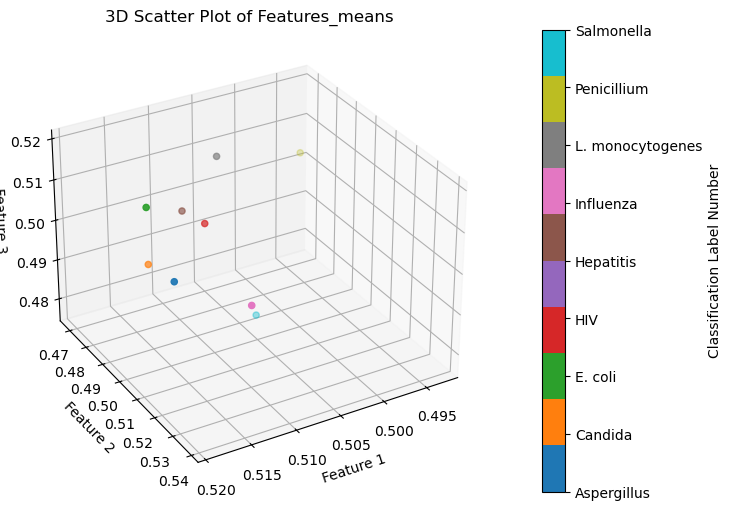

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3D axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(mean_df['feature1'], mean_df['feature2'], mean_df['feature3'], c=mean_df['Classification_Label_Num'], cmap='tab10', marker='o')
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title("3D Scatter Plot of Features_means")

# Add colorbar with ticks and label
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Classification Label Number')
cbar.set_ticks(range(len(mean_df['Classification_Label_Num'].unique())))
cbar.set_ticklabels(mean_df['Classification_Label'].unique())

# Set initial view angle
ax.view_init(elev=30, azim=60)  
plt.show()

In [10]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

pairwise_distances1 = pdist(mean_df[['feature1', 'Classification_Label_Num']], metric='euclidean')
linked = sch.linkage(pairwise_distances1)

In [11]:
pairwise_distances1

array([1.00000183, 2.00000002, 3.00000914, 4.00000555, 5.00000226,
       6.00000946, 7.00004624, 8.00001363, 1.00000246, 2.00000755,
       3.00000376, 4.00000101, 5.00000764, 6.00004615, 7.0000118 ,
       1.00002974, 2.00001213, 3.00000427, 4.00001502, 5.00006631,
       6.00001893, 1.00000028, 2.00000176, 3.00000176, 4.00004067,
       5.00000542, 1.00000182, 2.00000399, 3.00005881, 4.00000821,
       1.00001741, 2.00010703, 3.00001671, 1.00010937, 2.00000423,
       1.000057  ])

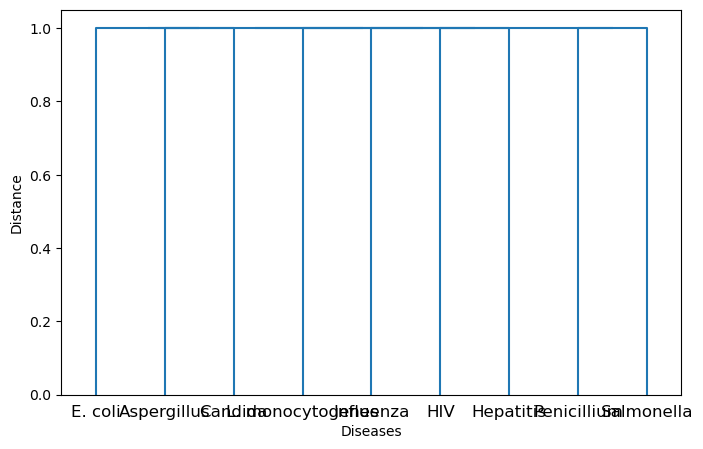

In [12]:
disease_names = mean_df["Classification_Label"].tolist()
# Plot dendrogram
plt.figure(figsize=(8, 5))
sch.dendrogram(linked, labels=disease_names, orientation="top")
plt.xlabel("Diseases")
plt.ylabel("Distance")
plt.show()

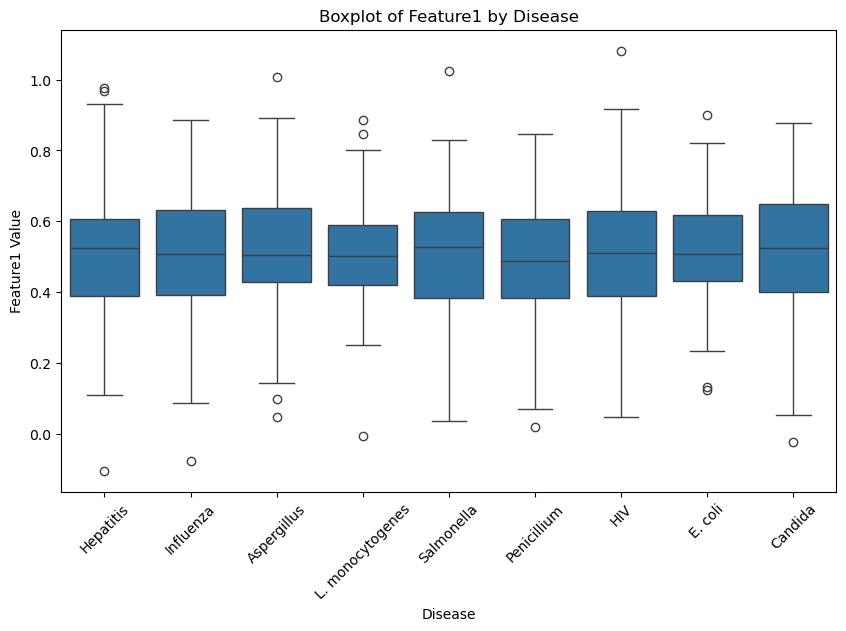

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Classification_Label"], y=df["feature1"])

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xlabel("Disease")
plt.ylabel("Feature1 Value")
plt.title("Boxplot of Feature1 by Disease")
plt.show()

C:\Users\Akanksha\AppData\Local\Temp\ipykernel_13932\2600422002.py:14: UserWarning: Adding colorbar to a different Figure <Figure size 800x600 with 2 Axes> than <Figure size 800x600 with 2 Axes> which fig.colorbar is called on.
  cbar = plt.colorbar(scatter, ax=ax, shrink=0.6, aspect=10)


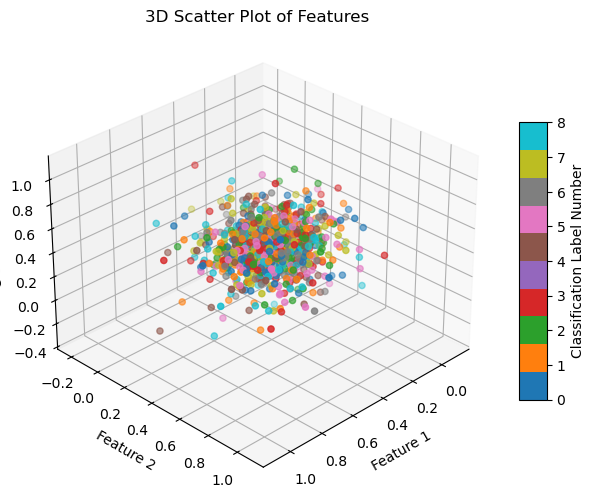

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3D axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['feature1'], df['feature2'], df['feature3'], c=df['classification_label_number'], cmap='tab10', marker='o')
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title("3D Scatter Plot of Features")

cbar = plt.colorbar(scatter, ax=ax, shrink=0.6, aspect=10)
cbar.set_label('Classification Label Number')

# Set initial view angle
ax.view_init(elev=30, azim=45) 
plt.show()

In [15]:
df['feature1L'] = np.log(df['feature1'])

C:\Users\Akanksha\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


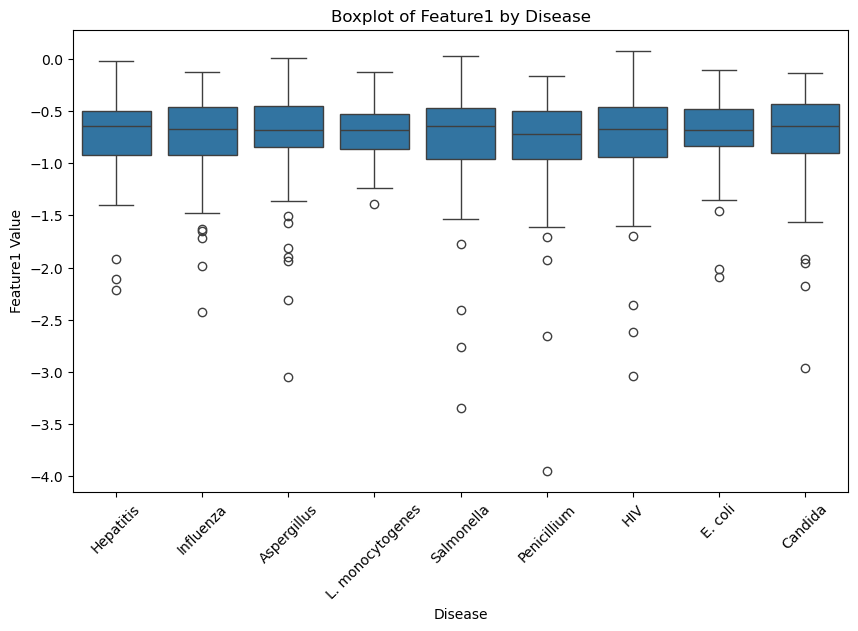

In [16]:
# to check

plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Classification_Label"], y=df["feature1L"])

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xlabel("Disease")
plt.ylabel("Feature1 Value")
plt.title("Boxplot of Feature1 by Disease")
plt.show()

In [17]:
# now using Pathogen class

In [18]:
df['Pathogen_Class']

0         Virus
1         Virus
2         Fungi
3      Bacteria
4      Bacteria
         ...   
995       Virus
996       Fungi
997       Fungi
998       Fungi
999       Virus
Name: Pathogen_Class, Length: 1000, dtype: object

In [19]:
import pandas as pd
from tabulate import tabulate

df[['feature1', 'feature2', 'feature3']] = df['Microbial_Signature'].apply(eval).apply(pd.Series)

mean_df2 = df.groupby(['Classification_Label', 'Pathogen_Class'])[['feature1', 'feature2', 'feature3']].mean().reset_index()

print(tabulate(mean_df2, headers="keys", tablefmt="grid"))

+----+------------------------+------------------+------------+------------+------------+
|    | Classification_Label   | Pathogen_Class   |   feature1 |   feature2 |   feature3 |
+====+========================+==================+============+============+============+
|  0 | Aspergillus            | Fungi            |   0.518642 |   0.521253 |   0.506563 |
+----+------------------------+------------------+------------+------------+------------+
|  1 | Candida                | Fungi            |   0.51673  |   0.496985 |   0.499609 |
+----+------------------------+------------------+------------+------------+------------+
|  2 | E. coli                | Bacteria         |   0.518948 |   0.508245 |   0.519064 |
+----+------------------------+------------------+------------+------------+------------+
|  3 | HIV                    | Virus            |   0.511236 |   0.501247 |   0.507885 |
+----+------------------------+------------------+------------+------------+------------+
|  4 | Hep

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
mean_df2["Classification_Label_Num"] = encoder.fit_transform(mean_df2["Classification_Label"])

In [21]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

pairwise_distances2 = pdist(mean_df2[['feature1', 'Classification_Label_Num']], metric='euclidean')
linked2 = sch.linkage(pairwise_distances2)

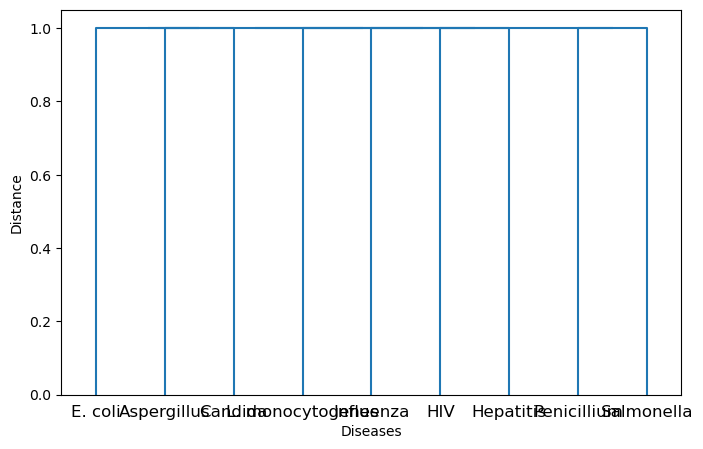

In [22]:
disease_names = mean_df2["Classification_Label"].tolist()
# Plot dendrogram
plt.figure(figsize=(8, 5))
sch.dendrogram(linked2, labels=disease_names, orientation="top")
plt.xlabel("Diseases")
plt.ylabel("Distance")
plt.show()

In [23]:
mean_df_group = df.groupby(['Classification_Label', 'Pathogen_Class', 'Biosensor_Type'])[['feature1', 'feature2', 'feature3']].mean().reset_index()
print(tabulate(mean_df_group))

--  ----------------  --------  ---------------  --------  --------  --------
 0  Aspergillus       Fungi     Electrochemical  0.520785  0.501854  0.501495
 1  Aspergillus       Fungi     Mass-based       0.638278  0.610228  0.589473
 2  Aspergillus       Fungi     Optical          0.372233  0.433359  0.411652
 3  Candida           Fungi     Electrochemical  0.532021  0.527645  0.466227
 4  Candida           Fungi     Mass-based       0.599137  0.591998  0.628512
 5  Candida           Fungi     Optical          0.392248  0.342963  0.351048
 6  E. coli           Bacteria  Electrochemical  0.500469  0.481486  0.48902
 7  E. coli           Bacteria  Mass-based       0.574266  0.597307  0.610851
 8  E. coli           Bacteria  Optical          0.45632   0.402508  0.414135
 9  HIV               Virus     Electrochemical  0.495832  0.494706  0.491468
10  HIV               Virus     Mass-based       0.631154  0.605267  0.616902
11  HIV               Virus     Optical          0.393165  0.3902

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
mean_df_group["Classification_Label_Num"] = encoder.fit_transform(mean_df_group["Classification_Label"])

In [25]:
pairwise_distances_gr = pdist(mean_df_group[['feature1', 'Classification_Label_Num']], metric='euclidean')
linked_gr = sch.linkage(pairwise_distances_gr)

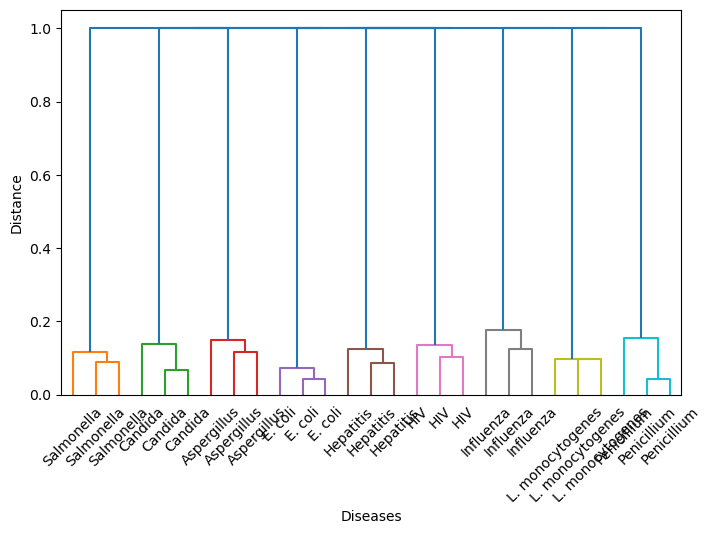

In [26]:
disease_names = mean_df_group["Classification_Label"].tolist()
# Plot dendrogram
plt.figure(figsize=(8, 5))
sch.dendrogram(linked_gr, labels=disease_names, orientation="top")
plt.xlabel("Diseases")
plt.ylabel("Distance")
plt.show()

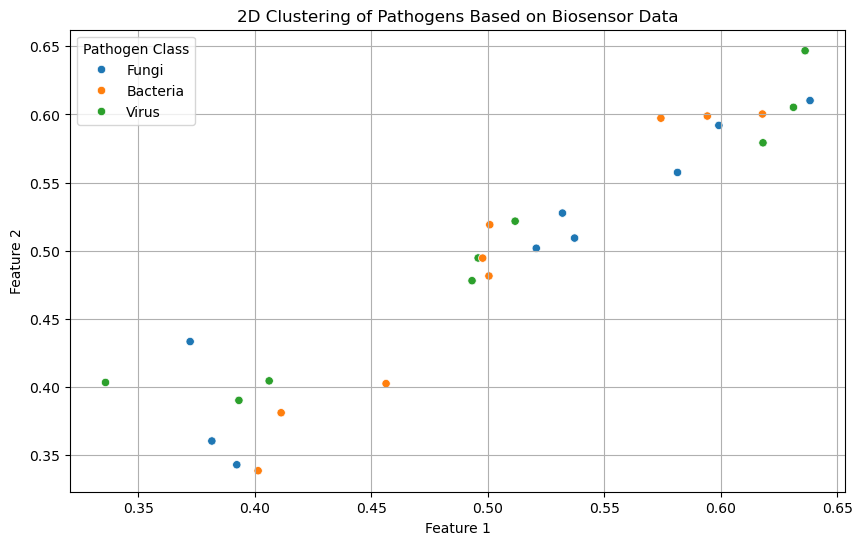

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot using feature1 and feature2
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mean_df_group, x='feature1', y='feature2', hue='Pathogen_Class')

# Labels and Title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Clustering of Pathogens Based on Biosensor Data')
plt.legend(title='Pathogen Class')
plt.grid(True)

# Show the plot
plt.show()

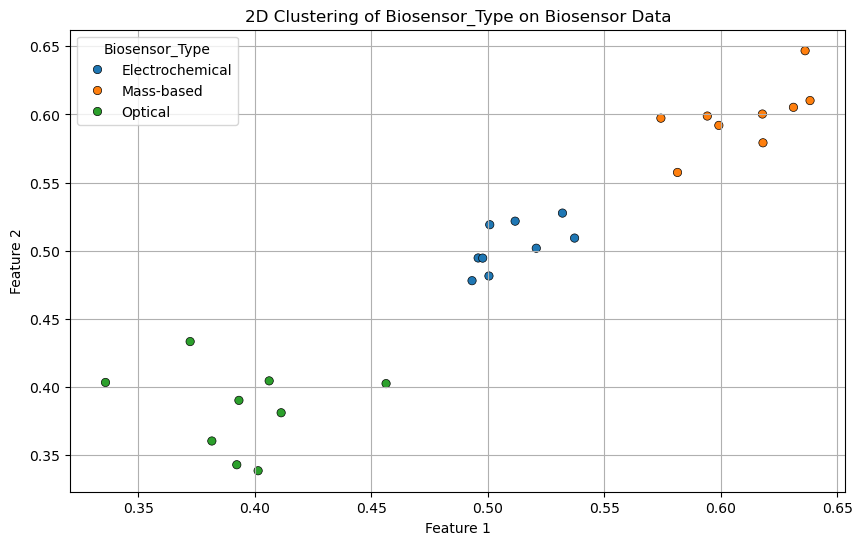

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot using feature1 and feature2
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mean_df_group, x='feature1', y='feature2', hue='Biosensor_Type', edgecolor='black')

# Labels and Title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Clustering of Biosensor_Type on Biosensor Data')
plt.legend(title='Biosensor_Type')
plt.grid(True)

# Show the plot
plt.show()